In [1]:
# Logistic Regression - but a classification problem 

# Because BTS it is regressing the probablity of happening of an event. 
# We apply a threshold and if the regressed value is above threshold we say YES otherwise NO

In [ ]:
# Log odds 
# Example - 5 chances are given for a game in which 2 times you WON and 3 times LOST

# log(odds) = chances for /chances against
# log(odd) = 2/3

In [ ]:
# Sigmoid

# x 
# sigmoid = 1/(1+e^-x)

In [5]:
import math
from math import e
def sigmoid(x):
    return 1/(1 + e**-x)

In [9]:
sigmoid(10)

0.9999546021312976

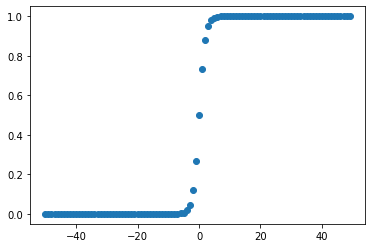

In [14]:
import matplotlib.pyplot as plt
plt.scatter(range(-50, 50), [sigmoid(i) for i in range(-50, 50)])

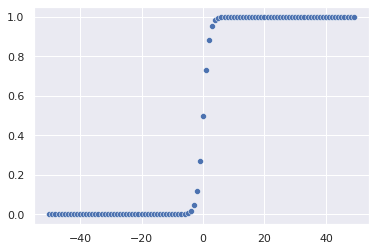

In [22]:
sns.scatterplot(x=range(-50, 50), y=[sigmoid(i) for i in range(-50, 50)])

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

In [29]:
from sklearn.datasets import load_iris

In [30]:
data = load_iris()

In [31]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
df = pd.DataFrame(data = data.data, columns= data.feature_names)

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df["target"] = data.target

In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [39]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
144,6.7,3.3,5.7,2.5,2
94,5.6,2.7,4.2,1.3,1
37,4.9,3.6,1.4,0.1,0
68,6.2,2.2,4.5,1.5,1
136,6.3,3.4,5.6,2.4,2
57,4.9,2.4,3.3,1.0,1
52,6.9,3.1,4.9,1.5,1
115,6.4,3.2,5.3,2.3,2
6,4.6,3.4,1.4,0.3,0
47,4.6,3.2,1.4,0.2,0


In [40]:
# one hot encoding

In [ ]:
# Target Variable   | Numerical Encoding    |  One Hot Encoding
#                                           |   Setosa |    Vir     |   Versi       
# Setosa            |       0               |     1    |     0      |     0
# Vir               |       1               |     0    |     1      |     0
# Versi             |       2               |     0    |     0      |     1
# Setoso            |       0               |     1    |     0      |     0
# Setosa            |       0               |
# Versi             |       2               |
# Setosa            |       0               |
# Vir               |       1               |

In [41]:
# one Hot encoding can be achieved by - 
# 1. pd.get_dummies 
# 2. sklearn One Hot Encoding

In [42]:
pd.get_dummies(["Cat", "Dog", "Cat", "Cat", "Dog", "Rat"])

,Cat,Dog,Rat
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,0,1


In [43]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
ohe = OneHotEncoder(dtype=int)

In [ ]:
# fit_transform = fit and transform
# transform     = only transform

In [73]:
ohe.fit(pd.DataFrame(data = ["Cat", "Rat", "Dog", "Cat", "Cat", "Dog"]))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'int'>,
              handle_unknown='error', sparse=True)

In [74]:
ohe_result = ohe.transform(pd.DataFrame(data = ["Cat", "Rat", "Dog", "Cat", "Cat", "Dog"]))

In [75]:
ohe_result.todense()

matrix([[1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0]])

In [76]:
ohe.categories_

[array(['Cat', 'Dog', 'Rat'], dtype=object)]

In [68]:
ohe.transform([["Rat"]]).todense()

matrix([[0, 0, 1]])

In [69]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
df2 = pd.DataFrame(columns=["Age", "Gender"])
df2["Age"] = np.random.randint(18, 99, 10)
df2["Gender"] = np.random.choice(["M", "F"], 10)
df2

,Age,Gender
0,25,M
1,74,M
2,38,M
3,32,M
4,40,M
5,40,M
6,47,F
7,96,F
8,71,F
9,24,F


In [97]:
ohe2 = OneHotEncoder(dtype=int)
gender_onehot = ohe2.fit_transform(df2[["Gender"]]).todense()

In [99]:
pd.DataFrame(gender_onehot, columns=ohe2.categories_[0].tolist())

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0


In [98]:
df3 = pd.concat([df2, pd.DataFrame(gender_onehot, columns=ohe2.categories_[0].tolist())], axis=1)

In [94]:
df3.head()

,Age,Gender,F,M
0,25,M,0.0,1.0
1,74,M,0.0,1.0
2,38,M,0.0,1.0
3,32,M,0.0,1.0
4,40,M,0.0,1.0


In [101]:
df3 = df3.drop(columns=["Gender"])

In [102]:
df3

,Age,F,M
0,25,0,1
1,74,0,1
2,38,0,1
3,32,0,1
4,40,0,1
5,40,0,1
6,47,1,0
7,96,1,0
8,71,1,0
9,24,1,0


In [103]:
pd.get_dummies(df2)

,Age,Gender_F,Gender_M
0,25,0,1
1,74,0,1
2,38,0,1
3,32,0,1
4,40,0,1
5,40,0,1
6,47,1,0
7,96,1,0
8,71,1,0
9,24,1,0


In [104]:
import pickle as pkl 
pkl.dump(ohe2, open("gender_encoder.pkl", "wb"))

In [105]:
# Read the encoder back 
oheGender = pkl.load(open("gender_encoder.pkl", "rb"))

In [106]:
oheGender.categories_

[array(['F', 'M'], dtype=object)]

In [108]:
# covert str to ohe-array 
oheGender.transform([["M"]]).todense()

matrix([[0, 1]])

In [110]:
# convert ohe-array to str
oheGender.inverse_transform([[0, 1]])

array([['M']], dtype=object)

In [111]:
df3.to_csv("preprocessed_data.csv", index=None)

In [112]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lr = LogisticRegression()

In [118]:
lr.fit(X=df.iloc[:, 0:4], y=df[["target"]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
lr.predict([[5.9, 3.0, 5.1, 1.8]])

array([2])